In [1]:
%load_ext autoreload
%autoreload 2

### Train Model

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:44<00:00,  2.24it/s]


Final metrics: 
Validation-Loss:  0.624
Validation-Accuracy:  71.0%
train-Loss:  0.545
train-Accuracy:  72.8%
# Parameters: 392
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=23, out_features=15, bias=True)
    (1): ReLU()
    (2): Linear(in_features=15, out_features=2, bias=True)
  )
)


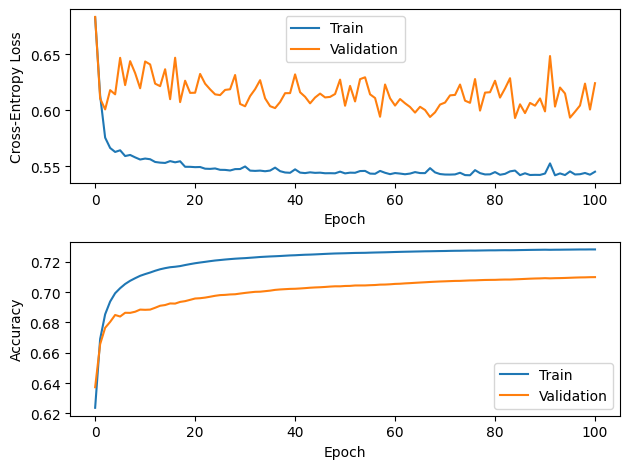

In [3]:
from network.training_heloc import train_model_and_visualize
import os
import torch

model = train_model_and_visualize(
    layers=[23,15,2],
    num_epochs=100,
    lr = 0.001,
    batch_size=32,
)
BASE_DIR = os.getenv('BASE_DIR')
torch.save(model, os.path.join(BASE_DIR, 'network', 'heloc_model.pth'))

In [2]:
import torch
import os

BASE_DIR = os.getenv('BASE_DIR')
model = torch.load(os.path.join(BASE_DIR, 'network', 'heloc_model.pth'))

/home/leon/programming/XAI-baselines/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Zero Baseline

  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
100%|██████████| 100/100 [00:01<00:00, 69.40it/s]


Mean: [0.77265151 0.39704627 0.24481047 0.23283593 0.18935427 0.17912035
 0.16635534 0.15627459 0.15483281 0.14882543 0.14929751 0.14967641
 0.15060048 0.15559107 0.16028159 0.17117471 0.18065189 0.1960643
 0.20969183 0.21107214 0.24346849 0.33995913 0.474408  ]


100%|██████████| 986/986 [00:03<00:00, 316.54it/s]


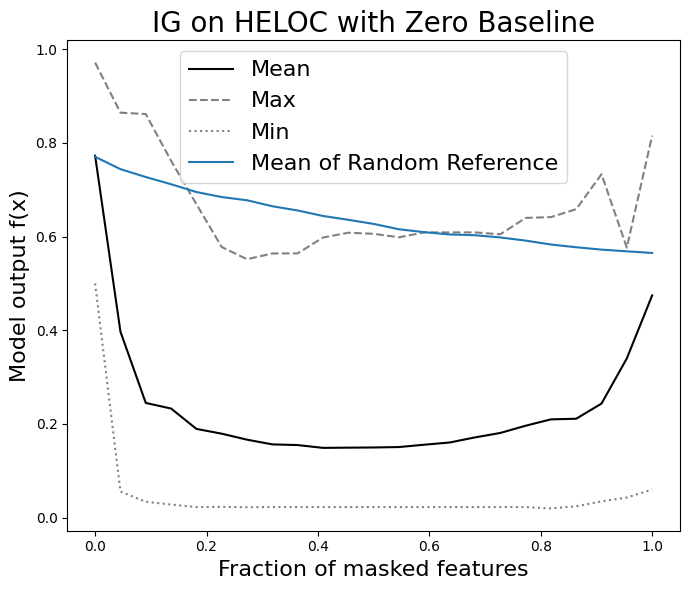

In [24]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from baselines import ZeroBaseline
from data import HELOC

data = HELOC(mode="test")
baseline_generator = ZeroBaseline(model)

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Zero Uniform Output Baseline

Prediction of zero baseline: [[0.82193214 0.17806791]])


  0%|          | 0/300 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:12<00:00, 23.74it/s]


initial_baseline: tensor([0.0074, 0.0059, 0.0062, 0.0061, 0.0096, 0.0080, 0.0077, 0.0085, 0.0088,
        0.0081, 0.0053, 0.0073, 0.0068, 0.0088, 0.0078, 0.0062, 0.0067, 0.0085,
        0.0072, 0.0087, 0.0088, 0.0054, 0.0066])
autobaseline: tensor([ 0.0074,  0.0057,  0.0063,  0.0060,  0.0095,  0.0080,  0.0076,  0.0084,
         0.0087,  0.0082, -0.1441,  0.0072,  0.0070,  0.0086,  0.0080,  0.0060,
         0.0066, -0.0320,  0.0072, -0.0483,  0.0089, -0.0539,  0.0067],
       grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5024, 0.4976])


  0%|          | 0/100 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:80: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
100%|██████████| 100/100 [00:01<00:00, 78.11it/s]


Mean: [0.77265151 0.42577006 0.28536788 0.21114943 0.16369081 0.12241601
 0.10558674 0.09029339 0.0811959  0.07615885 0.07501679 0.07343086
 0.07266805 0.07022393 0.0713752  0.0740374  0.07398524 0.08254183
 0.08962171 0.073379   0.08246111 0.13648305 0.29174476]


100%|██████████| 986/986 [00:03<00:00, 323.62it/s]


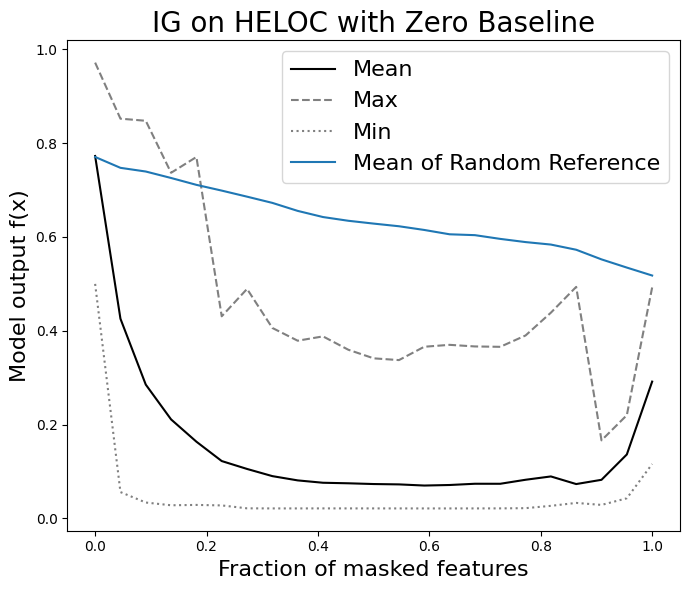

In [22]:
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC
import torch
from baselines import ZeroUniformOutputBaseline, set_precomputed_zero_uniform_output_baseline, get_precomputed_zero_uniform_ouput_baseline

print(f"Prediction of zero baseline: {model.predict(torch.zeros(1, 23)).detach().numpy()})")
#set_precomputed_zero_uniform_output_baseline(model)
baseline_generator = get_precomputed_zero_uniform_ouput_baseline()

data = HELOC(mode="test")

ig = IntegratedGradient(model)

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Zero Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False
)

### Furthest Uniform Output Baseline

In [3]:
from baselines.precomputed import set_precomputed_furthest_uniform_output_baseline, get_precomputed_furthest_uniform_output_baseline
from evaluation.attribution_methods_evaluator_heloc import AttributionMethodsEvaluator
from attribution import IntegratedGradient
from data import HELOC

test_data = HELOC(mode="test")
train_data = HELOC(mode="train")

set_precomputed_furthest_uniform_output_baseline(dataset_test=test_data, dataset_train=train_data, classification_model=model, baseline_error_weight=0.6)
baseline_generator = get_precomputed_furthest_uniform_output_baseline()

ig = IntegratedGradient(model)

print(test_data[0][0])

evaluator = AttributionMethodsEvaluator(model,dataset="HELOC")
evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC with Furthest Uniform Output Baseline",
    attribution_baseline=baseline_generator,
    masking_baseline=baseline_generator,
    apply_log=False,
    num_samples=100
)

  0%|          | 0/987 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:68: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y)
100%|██████████| 300/300 [00:11<00:00, 27.06it/s]
/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
  0%|          | 1/987 [00:11<3:02:18, 11.09s/it]

initial_baseline: tensor([0.1148, 0.2281, 0.0044, 0.1887, 0.0513, 0.7368, 0.5263, 0.2900, 0.1111,
        0.0000, 0.0000, 0.1700, 0.1579, 0.5300, 0.0312, 0.1739, 0.1739, 0.4750,
        0.2192, 0.2250, 0.3226, 0.3462, 1.0000])
autobaseline: tensor([ 2.5296e-01,  2.2823e-01, -9.8976e-02,  1.8882e-01,  5.1400e-02,
         7.3705e-01,  5.2614e-01,  2.8993e-01, -6.3554e-02,  5.7982e-05,
        -6.5629e-05,  1.6981e-01,  1.5798e-01,  5.2984e-01,  3.1452e-02,
        -6.7802e-01,  1.7406e-01,  3.0227e-01,  2.1907e-01,  2.2490e-01,
         3.2239e-01,  3.4620e-01,  9.9983e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])


  0%|          | 2/987 [00:21<2:53:30, 10.57s/it]

initial_baseline: tensor([0.1148, 0.2281, 0.0044, 0.1887, 0.0513, 0.7368, 0.5263, 0.2900, 0.1111,
        0.0000, 0.0000, 0.1700, 0.1579, 0.5300, 0.0312, 0.1739, 0.1739, 0.4750,
        0.2192, 0.2250, 0.3226, 0.3462, 1.0000])
autobaseline: tensor([ 2.5296e-01,  2.2823e-01, -9.8976e-02,  1.8882e-01,  5.1400e-02,
         7.3705e-01,  5.2614e-01,  2.8993e-01, -6.3554e-02,  5.7982e-05,
        -6.5629e-05,  1.6981e-01,  1.5798e-01,  5.2984e-01,  3.1452e-02,
        -6.7802e-01,  1.7406e-01,  3.0227e-01,  2.1907e-01,  2.2490e-01,
         3.2239e-01,  3.4620e-01,  9.9983e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])


  0%|          | 3/987 [00:32<2:55:49, 10.72s/it]

initial_baseline: tensor([0.5246, 0.6289, 0.0044, 0.2107, 1.0000, 0.0526, 0.0526, 0.9900, 0.2556,
        0.6667, 0.6667, 1.0000, 1.0000, 0.1500, 0.2500, 0.1304, 0.1304, 0.0750,
        0.2046, 0.4500, 0.3548, 0.3462, 0.4259])
autobaseline: tensor([0.5247, 0.6293, 0.0042, 0.2107, 1.0000, 0.0522, 0.0530, 0.9901, 0.2558,
        0.6671, 0.6664, 1.0001, 1.0001, 0.1498, 0.2502, 0.2166, 0.1307, 0.0749,
        0.2042, 0.4499, 0.3548, 0.3463, 0.4263], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.4985, 0.5015])


  0%|          | 4/987 [00:42<2:52:06, 10.51s/it]

initial_baseline: tensor([0.4098, 0.0197, 0.0088, 0.0000, 0.0128, 0.0000, 0.0000, 1.0000, 0.0111,
        0.7778, 1.0000, 0.0300, 0.1579, 0.0000, 0.2500, 1.0000, 1.0000, 0.3250,
        0.0000, 0.2750, 0.0000, 0.3846, 1.0000])
autobaseline: tensor([ 4.1033e-01,  1.9585e-02,  8.6462e-03, -3.1448e-05,  1.2770e-02,
         2.4137e-04, -8.5901e-05,  1.0001e+00,  1.1452e-02,  7.7770e-01,
         9.9972e-01,  2.9956e-02,  1.5785e-01, -2.0469e-04,  2.4979e-01,
         9.9996e-01,  1.0000e+00,  3.2473e-01, -2.2707e-04,  2.7493e-01,
         6.8414e-05,  3.8454e-01,  9.9974e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9735, 0.0265])


  1%|          | 5/987 [00:53<2:56:54, 10.81s/it]

initial_baseline: tensor([0.4098, 0.0197, 0.0088, 0.0000, 0.0128, 0.0000, 0.0000, 1.0000, 0.0111,
        0.7778, 1.0000, 0.0300, 0.1579, 0.0000, 0.2500, 1.0000, 1.0000, 0.3250,
        0.0000, 0.2750, 0.0000, 0.3846, 1.0000])
autobaseline: tensor([ 4.1033e-01,  1.9585e-02,  8.6462e-03, -3.1448e-05,  1.2770e-02,
         2.4137e-04, -8.5901e-05,  1.0001e+00,  1.1452e-02,  7.7770e-01,
         9.9972e-01,  2.9956e-02,  1.5785e-01, -2.0469e-04,  2.4979e-01,
         9.9996e-01,  1.0000e+00,  3.2473e-01, -2.2707e-04,  2.7493e-01,
         6.8414e-05,  3.8454e-01,  9.9974e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.9735, 0.0265])


  1%|          | 6/987 [01:04<2:59:06, 10.95s/it]

initial_baseline: tensor([0.3934, 0.1689, 0.1278, 0.2201, 0.1538, 0.8947, 0.8421, 0.3000, 0.1556,
        0.1111, 0.1667, 0.3000, 0.0000, 0.7300, 0.0312, 0.0000, 0.0000, 0.1417,
        0.1148, 0.2500, 0.5484, 0.3077, 0.9259])
autobaseline: tensor([ 4.2372e-01,  1.6885e-01,  3.5663e-02,  2.2018e-01,  1.5391e-01,
         8.9514e-01,  8.4226e-01,  2.9981e-01,  2.0970e-03,  1.1108e-01,
         1.6628e-01,  2.9977e-01, -7.5087e-05,  7.3000e-01,  3.1171e-02,
        -4.2792e-01, -6.4281e-05,  6.9494e-02,  1.1480e-01,  2.5008e-01,
         5.4784e-01,  3.0778e-01,  9.2604e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5008, 0.4992])


  1%|          | 7/987 [01:16<2:59:36, 11.00s/it]

initial_baseline: tensor([0.1148, 0.2281, 0.0044, 0.1887, 0.0513, 0.7368, 0.5263, 0.2900, 0.1111,
        0.0000, 0.0000, 0.1700, 0.1579, 0.5300, 0.0312, 0.1739, 0.1739, 0.4750,
        0.2192, 0.2250, 0.3226, 0.3462, 1.0000])
autobaseline: tensor([ 2.5296e-01,  2.2823e-01, -9.8976e-02,  1.8882e-01,  5.1400e-02,
         7.3705e-01,  5.2614e-01,  2.8993e-01, -6.3554e-02,  5.7982e-05,
        -6.5629e-05,  1.6981e-01,  1.5798e-01,  5.2984e-01,  3.1452e-02,
        -6.7802e-01,  1.7406e-01,  3.0227e-01,  2.1907e-01,  2.2490e-01,
         3.2239e-01,  3.4620e-01,  9.9983e-01], grad_fn=<SqueezeBackward3>)
prediction: tensor([0.5007, 0.4993])


In [14]:
import torch

def closest_vectors(A, B):
    distances = torch.cdist(A, B)  # Compute pairwise distances between all vectors in A and B
    min_distances, min_indices = torch.min(distances, dim=1)  # Find the minimum distance and its index for each vector in A
    return min_distances, min_indices

# Example usage
A = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Example set A
B = torch.tensor([[1.5, 2.5], [2.0, 3.0], [4.0, 5.0], [6.0, 7.0]])  # Example set B

min_distances, min_indices = closest_vectors(A, B)
print("Minimum distances:", min_distances)
print("Indices of closest vectors in B:", min_indices)


Minimum distances: tensor([0.7071, 1.4142, 1.4142])
Indices of closest vectors in B: tensor([0, 1, 2])


In [ ]:
from baselines.uniform_output.nearest_furthest_calculator import get_furthest_baseline
from data import HELOC
from baselines import FurthestUniformOutputBaseline

data = HELOC(mode="validation")
baseline_gen = FurthestUniformOutputBaseline(model,data)

print(baseline_gen.get_baseline(x=data[0][0]))



TypeError: unsupported operand type(s) for -: 'Tensor' and 'tuple'

  0%|          | 0/986 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:08<00:00, 113.94it/s]


Mean: [0.77055588 0.63972584 0.53608954 0.46784903 0.42385979 0.39644077
 0.37859705 0.36586053 0.35644438 0.34913809 0.34402467 0.34069222
 0.33861288 0.3386145  0.34033739 0.34345112 0.34846075 0.35513763
 0.3636111  0.37486024 0.39023375 0.41309682 0.45156287]


100%|██████████| 986/986 [00:02<00:00, 465.43it/s]


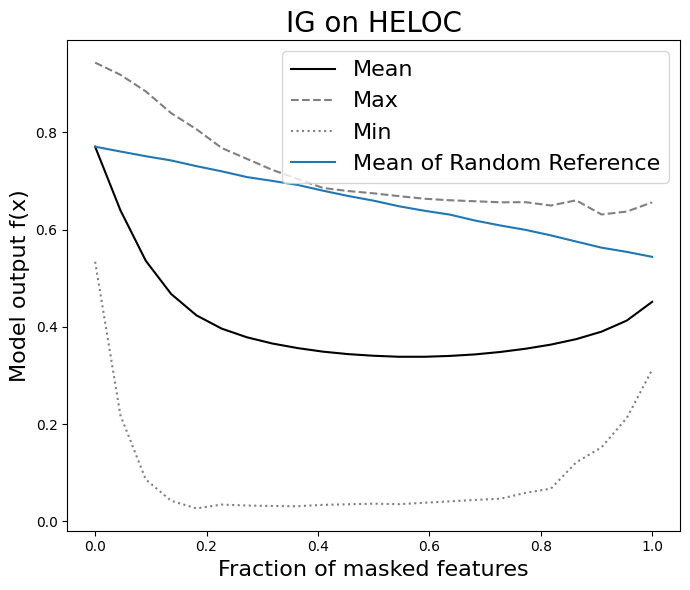

In [7]:
from baselines import MeanBaseline
from data import HELOC

data = HELOC(mode="validation")

mean_baseline_generator = MeanBaseline(data)
mean_baseline = mean_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=mean_baseline_generator,
    masking_baseline=mean_baseline_generator,
    apply_log=False
)

  0%|          | 0/986 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:65: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
/home/leon/programming/XAI-baselines/evaluation/attribution_methods_evaluator_heloc.py:79: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input = torch.tensor(x, requires_grad=True).unsqueeze(0)
100%|██████████| 986/986 [00:02<00:00, 372.79it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


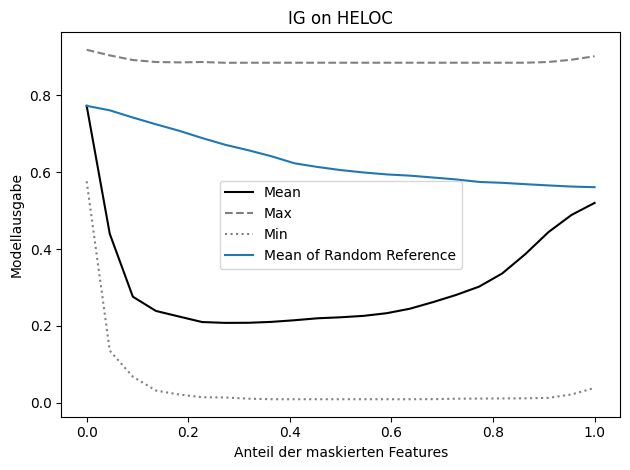

In [ ]:
from baselines import ZeroBaseline
zero_baseline_generator = ZeroBaseline(model)
zero_baseline = zero_baseline_generator.get_baseline()

evaluator.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="IG on HELOC",
    attribution_baseline=zero_baseline_generator,
    masking_baseline=zero_baseline_generator,
    apply_log=False
)